In [47]:
# import neccessary tools 

import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np

%matplotlib inline

In [48]:
# 1st data file algo_returns import and calculate null values.

file_algo = Path("Resources/algo_returns.csv")
df_algo = pd.read_csv(file_algo, index_col="Date", parse_dates=True, infer_datetime_format=True)
df_algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [49]:
# print out algo_returns with null values.

df_algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [50]:
# print out algo_returns without null values.

new_algo = df_algo.dropna()
new_algo = new_algo.rename(columns={"Algo 1":"Algo_1",})
new_algo = new_algo.rename(columns={"Algo 2":"Algo_2"})
new_algo.head()

,Algo_1,Algo_2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [51]:
# 2nd data file I_historical print out of dataframe.

file_historical = Path("Resources/l_historical.csv")
df_historical = pd.read_csv(file_historical, index_col="Date", parse_dates=True, infer_datetime_format=True)
new_historical = df_historical.dropna()
new_historical.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [52]:
# 3rd data file otex_historical print out of data frame.

file_otex = Path("Resources/otex_historical.csv")
df_otex = pd.read_csv(file_otex, index_col="Date", parse_dates=True, infer_datetime_format=True)
new_otex = df_otex.dropna()
new_otex.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [53]:
# 5th data file sp_tsx_history print out of data frame.

file_sp_tsx = Path("Resources/sp_tsx_history.csv")
df_sp_tsx = pd.read_csv(file_sp_tsx, index_col="Date", parse_dates=True, infer_datetime_format=True)
new_sp_tsx = df_sp_tsx.dropna()
new_sp_tsx.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [54]:
# remove dollar sign from sp_tsx_history data frame.

new_sp_tsx["Close"] = new_sp_tsx["Close"].str.replace("$","")
new_sp_tsx["Close"] = new_sp_tsx["Close"].str.replace(",","")
new_sp_tsx["Close"] = new_sp_tsx["Close"].astype("float")
new_sp_returns = new_sp_tsx.pct_change()
new_sp_returns.head()

<ipython-input-54-bd77cd1ed1e8>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  new_sp_tsx["Close"] = new_sp_tsx["Close"].str.replace("$","")


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [55]:
    # check data type

new_sp_tsx.dtypes

Close    float64
dtype: object

In [56]:
# print out of sp_tsx_history data frame  with Daily_returns as new heading.

new_sp_returns = new_sp_returns.rename(columns={"Close":"Daily_returns"})
new_sp_returns.head()

,Daily_returns
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [57]:
    # drop null value

new_sp_returns = new_sp_returns.dropna().copy()
new_sp_returns.head()

,Daily_returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [58]:
# 6th data file whale_returns print out of dataframe.

file_whale = Path("Resources/whale_returns.csv")
df_whale = pd.read_csv(file_whale, index_col="Date", parse_dates=True, infer_datetime_format=True)
new_whale = df_whale.dropna()
new_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [59]:
# Combine data files algo_returns, sp_tsxhistory, and whale_returns.

combined_newfile = pd.concat([new_algo, new_sp_returns, new_whale], axis="columns", join="inner")
combined_newfile.head()

,Algo_1,Algo_2,Daily_returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.008530,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.008589,0.002416,-0.003371,0.002230,0.003241,-0.002534,0.004213
2015-03-05,-0.000955,0.004323,0.001344,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.004957,-0.011460,-0.009972,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.005447,0.001303,-0.006555,0.000582,0.004225,0.005843,-0.001652


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

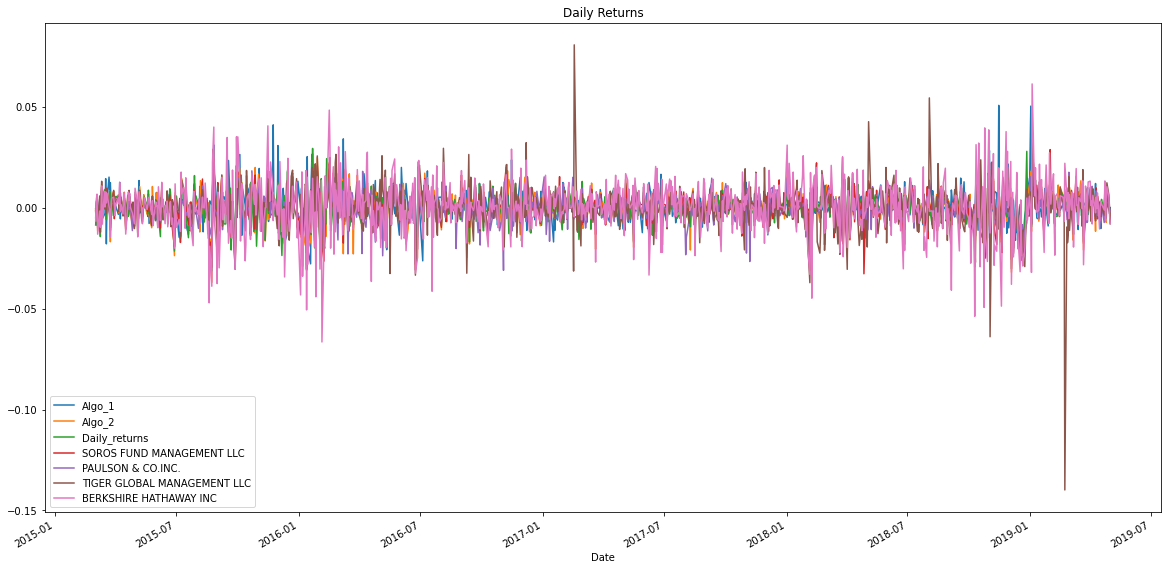

In [60]:
# quantative analysis
combined_newfile.plot(figsize=(20,10), title="Daily Returns")

In [61]:
# performance analysis
cumulative_returns = (1 + combined_newfile).cumprod() - 1
cumulative_returns.head()

,Algo_1,Algo_2,Daily_returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.008530,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.010514,0.001464,-0.011872,0.000962,-0.001755,-0.003028,-0.002383
2015-03-05,-0.011459,0.005794,-0.010544,0.004981,0.002314,-0.000681,0.004327
2015-03-06,-0.016359,-0.005733,-0.020411,-0.002963,-0.001269,-0.009156,-0.008828
2015-03-09,-0.021717,-0.004437,-0.026832,-0.002383,0.002951,-0.003367,-0.010466


<AxesSubplot:xlabel='Date'>

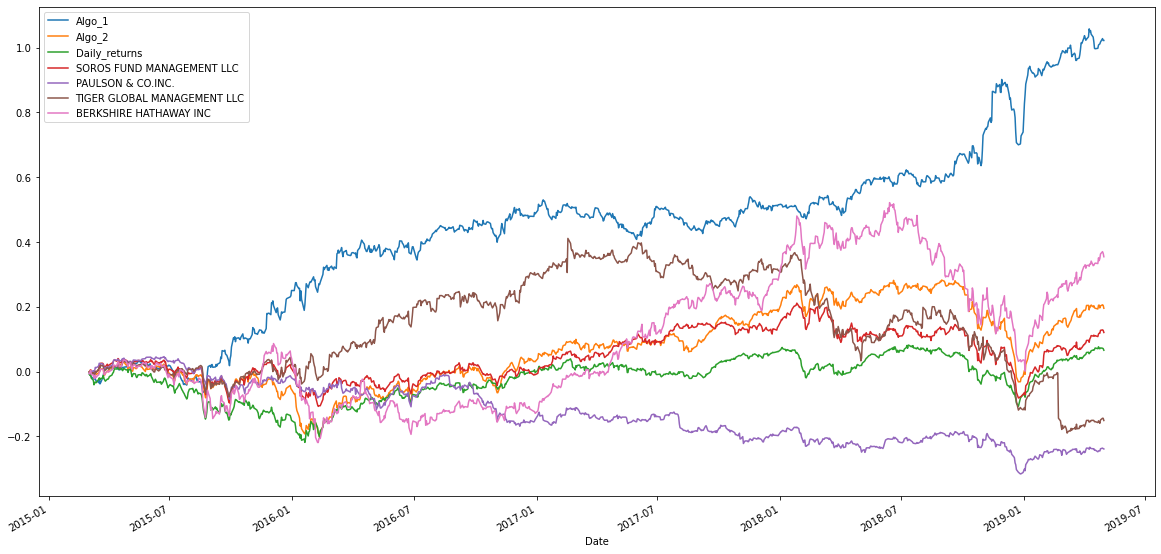

In [62]:
cumulative_returns.plot(figsize=(20,10))


Based on the graph it is showing that Algo_1, Algo_2, Soros Fund Man., and Birkshire Hathaway outperformed the S&P TSX 60

<AxesSubplot:>

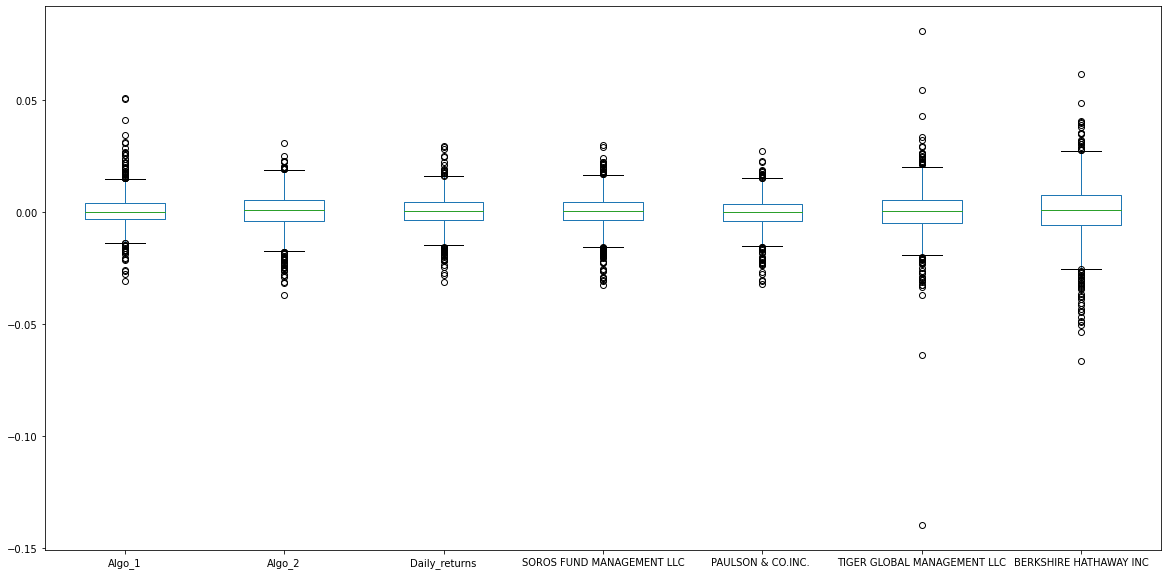

In [63]:
# risk analysis
combined_newfile.plot.box(figsize=(20,10))

In [64]:
        # calculating standard deviation

std_combined_newfile= pd.DataFrame(combined_newfile)
std_combined_newfile= std_combined_newfile .std()
std_combined_newfile

Algo_1                         0.007589
Algo_2                         0.008326
Daily_returns                  0.007034
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

In [65]:
        # determine which protfolio is riskier than S&P TSX 60

std_combined_newfile = std_combined_newfile.sort_values(ascending=False)
std_combined_newfile.head()

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo_2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo_1                         0.007589
dtype: float64

According to my calculation it is determined that Berkshire Hathaway Inc is the most risky 

In [66]:
        # calculate the annualized std
    
annualized_std_cf = std_combined_newfile * np.sqrt(252)
annualized_std_cf.head()


BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo_2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo_1                         0.120470
dtype: float64

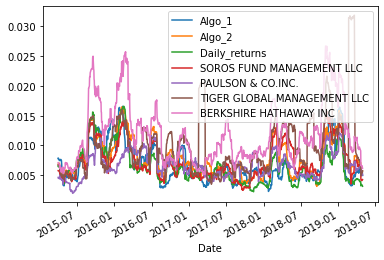

In [67]:
# rolling std 21 day window

combined_newfile_rol = combined_newfile.rolling(window=21).std().plot()

In [68]:
# calculate and plot corelation

combined_newfile_2 = combined_newfile.corr()
combined_newfile_2


,Algo_1,Algo_2,Daily_returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Algo_1,1.000000,0.285455,0.310276,0.313795,0.266363,0.161236,0.289378
Algo_2,0.285455,1.000000,0.737370,0.826667,0.674015,0.506689,0.684609
Daily_returns,0.310276,0.737370,1.000000,0.673930,0.486511,0.440583,0.557250
SOROS FUND MANAGEMENT LLC,0.313795,0.826667,0.673930,1.000000,0.697076,0.560964,0.750181
PAULSON & CO.INC.,0.266363,0.674015,0.486511,0.697076,1.000000,0.433034,0.540033
TIGER GLOBAL MANAGEMENT LLC,0.161236,0.506689,0.440583,0.560964,0.433034,1.000000,0.423524
BERKSHIRE HATHAWAY INC,0.289378,0.684609,0.557250,0.750181,0.540033,0.423524,1.000000


<AxesSubplot:>

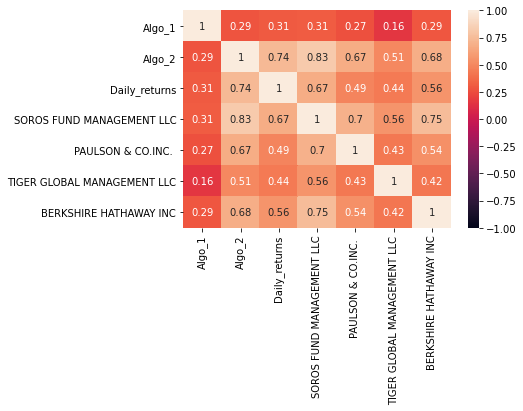

In [69]:
    # plot correlation 
sns.heatmap(combined_newfile_2, vmin=-1, vmax=1, annot=True)

In [70]:
    # calculate variance for sp tex 60 to peerform beta

variance = combined_newfile["Daily_returns"].var()
variance

4.9479515915131015e-05

In [71]:
    # calculate covariance for algo_returns to perform beta

covariance = combined_newfile["Algo_1"].cov(combined_newfile["Daily_returns"])
covariance

1.6563000308911375e-05

<AxesSubplot:title={'center':'60 day rolling covariance'}, xlabel='Date'>

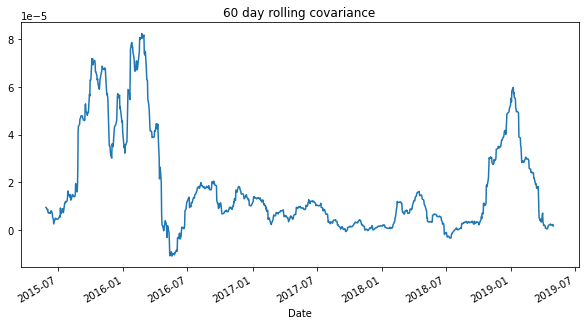

In [72]:
    # calculate 60 day rolling covariance

rolling_covariance = combined_newfile["Algo_1"].rolling(window=60).cov(combined_newfile["Daily_returns"])
rolling_covariance.plot(figsize=(10,5), title = "60 day rolling covariance")

<AxesSubplot:title={'center':'60 day rolling variance'}, xlabel='Date'>

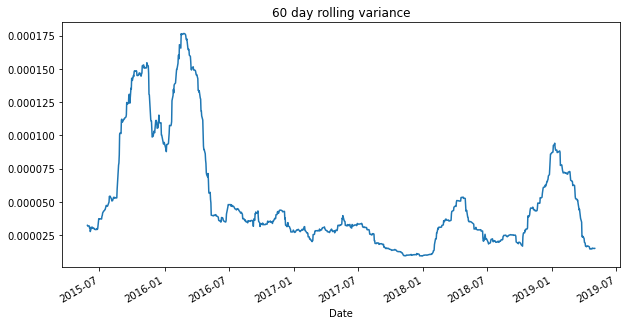

In [73]:
    # calculate 60 rolling variance
    
rolling_variance = combined_newfile["Daily_returns"].rolling(window =60).var()
rolling_variance.plot(figsize=(10,5), title = "60 day rolling variance")

<AxesSubplot:title={'center':'Rolling 60 day beta for algo_returns, Algo_1'}, xlabel='Date'>

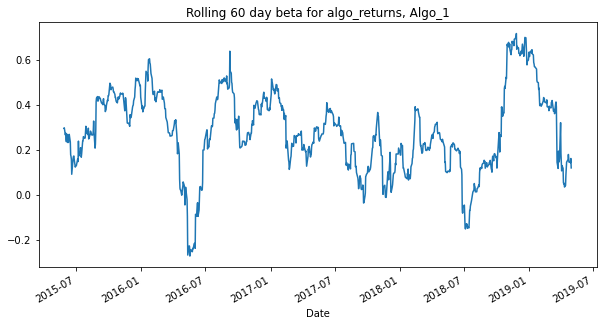

In [74]:
    # calculate 60 day rolling beta
    
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(10,5), title = "Rolling 60 day beta for algo_returns, Algo_1")

In [75]:
    # calculating sharpe ratio
sharpe_ratio = combined_newfile["Algo_1"].mean() / combined_newfile["Algo_1"]
sharpe_ratio


Date
2015-03-03   -0.367137
2015-03-04   -0.083018
2015-03-05   -0.746585
2015-03-06   -0.143850
2015-03-09   -0.130901
                ...   
2019-04-25    1.044779
2019-04-26    0.239179
2019-04-29    0.136912
2019-04-30   -0.242206
2019-05-01    7.607900
Name: Algo_1, Length: 1029, dtype: float64

Algo_1 returns does not outperform the sp tsx60 

<AxesSubplot:title={'center':'Sharpe ratio'}, xlabel='Date'>

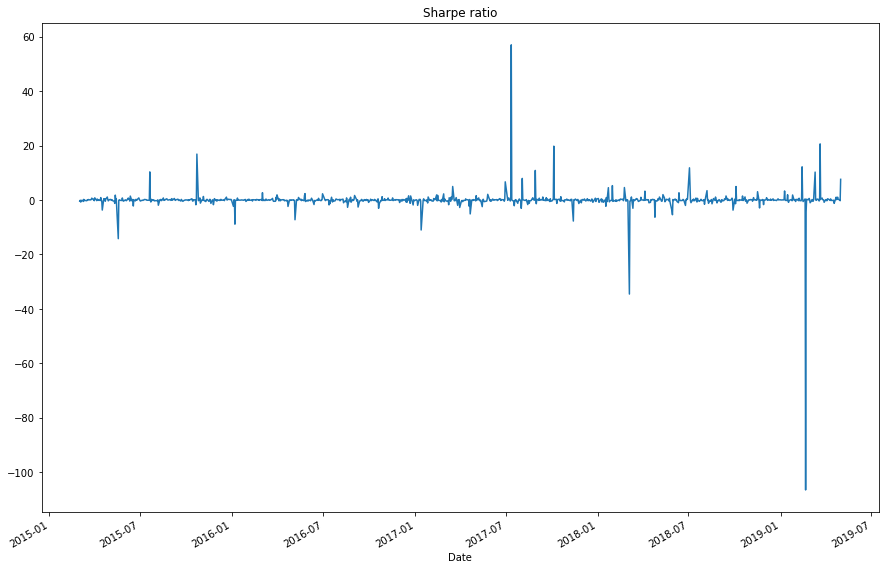

In [76]:
sharpe_ratio.plot(figsize = (15,10), title = "Sharpe ratio") 

In [77]:
# creating my new portfolio

file_AC_TO = Path("Resources_2/AC.TO.csv")
file_AC_TO = pd.read_csv(file_AC_TO, index_col="Date", parse_dates=True, infer_datetime_format=True)
file_AC_TO.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [78]:
    # portfolio air canada
file_AC_TO.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-03-03,12.24,12.43,11.94,12.42,12.42,1341600
2015-03-04,12.40,12.44,12.21,12.38,12.38,531000
2015-03-05,12.54,12.62,12.34,12.43,12.43,940100
2015-03-06,12.31,12.36,12.00,12.29,12.29,895200
2015-03-09,12.29,12.32,12.06,12.31,12.31,1022100


In [79]:
# drop unwated columns in dataframe

file_ac = file_AC_TO.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
file_ac = file_ac.pct_change()
file_ac.head()

,Close
Date,
2015-03-03,NaN
2015-03-04,-0.003221
2015-03-05,0.004039
2015-03-06,-0.011263
2015-03-09,0.001627


In [97]:
    # drop null values

file_ac = file_ac.dropna().copy()

file_ac.head()

,Close
Date,
2015-03-04,-0.003221
2015-03-05,0.004039
2015-03-06,-0.011263
2015-03-09,0.001627
2015-03-10,-0.007311


In [81]:
# creating new new portfolio

file_AMCX = Path("Resources_2/AMCX.csv")
file_AMCX = pd.read_csv(file_AMCX, index_col="Date", parse_dates=True, infer_datetime_format=True)
file_AMCX.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [82]:
    # portfolio AMCX

file_AMCX.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-03-04,73.970001,74.639999,73.410004,74.230003,74.230003,495500
2015-03-05,74.239998,74.550003,73.019997,73.190002,73.190002,627600
2015-03-06,72.650002,73.940002,72.160004,72.459999,72.459999,493300
2015-03-09,72.680000,73.320000,72.279999,72.779999,72.779999,540200
2015-03-10,72.160004,72.800003,71.330002,71.349998,71.349998,405600


In [83]:
# drop unwated columns in dataframe

file_amcx = file_AMCX.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
file_amcx = file_amcx.pct_change()
file_amcx.head()

,Close
Date,
2015-03-04,NaN
2015-03-05,-0.014011
2015-03-06,-0.009974
2015-03-09,0.004416
2015-03-10,-0.019648


In [84]:
    # drop nullvalues

file_amcx = file_amcx.dropna().copy()
file_amcx.head()

,Close
Date,
2015-03-05,-0.014011
2015-03-06,-0.009974
2015-03-09,0.004416
2015-03-10,-0.019648
2015-03-11,0.001682


In [85]:
# creating new new portfolio

file_bbd = Path("Resources_2/BBD-B.TO.csv")
file_bbd = pd.read_csv(file_bbd, index_col="Date", parse_dates=True, infer_datetime_format=True)
file_bbd.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [86]:
    # file Bombardier Toronto

file_bbd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-03-03,2.49,2.50,2.38,2.41,2.41,11666803
2015-03-04,2.42,2.43,2.26,2.30,2.30,23785980
2015-03-05,2.34,2.41,2.30,2.35,2.35,11907662
2015-03-06,2.38,2.42,2.28,2.33,2.33,11643314
2015-03-09,2.37,2.41,2.31,2.39,2.39,7835031


In [87]:
# drop unwated columns in dataframe

file_bbd = file_bbd.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
file_bbd = file_bbd.pct_change()
file_bbd.head()

,Close
Date,
2015-03-03,NaN
2015-03-04,-0.045643
2015-03-05,0.021739
2015-03-06,-0.008511
2015-03-09,0.025751


In [88]:
    # drop nullvalues

file_bbd = file_bbd.dropna().copy()
file_bbd.head()

,Close
Date,
2015-03-04,-0.045643
2015-03-05,0.021739
2015-03-06,-0.008511
2015-03-09,0.025751
2015-03-10,-0.020921


Calculate weighted returns for new portfolio

In [111]:
# creating new pivot table for date 

all_prices = pd.concat([file_ac, file_amcx, file_bbd], axis="rows", join="inner")
all_prices = all_prices.reset_index()
all_prices = all_prices.pivot_table(values="Close", index="Date")
all_prices.head()

,Close
Date,
2015-03-04,-0.024432
2015-03-05,0.003922
2015-03-06,-0.009916
2015-03-09,0.010598
2015-03-10,-0.015960


In [112]:
    # calculate weighted returns

close_weight = 0.5

returns= close_weight * all_prices["Close"]

returns.head()

Date
2015-03-04   -0.012216
2015-03-05    0.001961
2015-03-06   -0.004958
2015-03-09    0.005299
2015-03-10   -0.007980
Name: Close, dtype: float64

In [113]:
portfolio = pd.concat(combined_newfile, returns)
portfolio.head()

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"